# Another linear programming problem for even more beginner beginners

Let's find the maximum of the problem
<br>Z = 4x + 3y
<br>subject to the constraints...
<br>x>=0
<br>y>=2
<br>2y<=25-x
<br>4y>=2x-8
<br>y<=2x-5

### Solving using graphical method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Construct lines
# x > 0
x = np.linspace(0,20,2000) # plots 2000 points between 0 and 20

# y > 2
y1 = (x*0) + 2

# 2y <= 25-x
y2 = -x/2.0 + 25/2.0

# 4y >= 2x-8
y3 = x/2.0 - 4.0

# y <= 2x-5
y4 = 2*x - 5

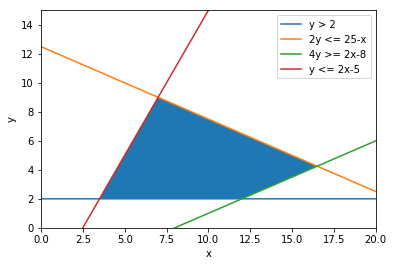

In [3]:
# Plot various lines
plt.plot(x, y1, label='y > 2')
plt.plot(x, y2, label='2y <= 25-x')
plt.plot(x, y3, label='4y >= 2x-8')
plt.plot(x, y4, label='y <= 2x-5')

# Set min/max points on axes
plt.xlim((0,20))
plt.ylim((0,15))

# X and y labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Fill region
plt.fill_between(x, np.minimum(y2,y4), np.maximum(y1,y3), where=np.minimum(y2,y4)>np.maximum(y1,y3))

plt.show()

From here we can calculate the minimum and maximum values for x and y then use these to calculate the maximum value of Z (73.75 where x=14.5 and y=5.25)
<br>
However, this method becomes inefficient when the optimisation function becomes more complex

# PuLP (Python Linear Programming)
Let's solve the same problem with PuLP
<br>Maximize
<br>Z = 4x + 3y
<br>subject to the constraints...
<br>x>=0
<br>y>=2
<br>2y<=25-x
<br>4y>=2x-8
<br>y<=2x-5


In [4]:
import pulp

In [5]:
lp = pulp.LpProblem('Maximisation',pulp.LpMaximize)


In [6]:
# Crete the boundaries,  x>=0, y>=2
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')


In [7]:
# Define the objective function X = 4x + 3y
lp += 4.0*x + 3.0*y

# Define the constraints
# 2y<=25-x 
lp += 2.0*y<=25 - x
# 4y>=2x-8
lp += 4.0*y>=2.0*x - 8
# y<=2x-5
lp += y<=2.0*x - 5


In [8]:
lp

Maximisation:
MAXIMIZE
4.0*x + 3.0*y + 0.0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

In [9]:
lp.solve()
pulp.LpStatus[lp.status]

'Optimal'

In [10]:
print(f"The optimum variables are")
for variable in lp.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"The optimal value is {pulp.value(lp.objective)}")

The optimum variables are
x = 14.5
y = 5.25
The optimal value is 73.75


# Real world LP problems 
## 1. Resource Control
We’re consulting for a boutique car manufacturer, producing luxury cars.
<br>
They run on one month (30 days) cycles, we have one cycle to show we can provide value.
<br>
There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.
<br>
The 2 cars need different time with each resource:
<br>
Robot time: Car A – 3 days; Car B – 4 days.
<br>
Engineer time: Car A – 5 days; Car B – 6 days.
<br>
Detailer time: Car A – 1.5 days; Car B – 3 days.
<br>
Car A provides €30,000 profit, whilst Car B offers €45,000 profit.
<br>
At the moment, they produce 4 of each cars per month, for €300,000 profit. Not bad at all, but we think we can do better for them.

### Representing the model
Maximise
<br>Profit = 30000A + 45000B
<br>subject to
<br>a$\geq$0
<br>b$\geq$0
<br>3a+4b$\leq$30
<br>5a+6b$\leq$60
<br>1.5a+3b$\leq$21

In [11]:
import pulp
car_model = pulp.LpProblem('Car profit maximisation', pulp.LpMaximize)

In [12]:
# Define variables (since we can't sell half a car, the variables are discrete - integer)
a = pulp.LpVariable('a', lowBound=0, cat='Integer')
b = pulp.LpVariable('b', lowBound=0, cat='Integer')

# Define the objective function
car_model += 30000.0*a + 45000.0*b, 'Profit'

# Constraints
car_model += 3.0*a + 4.0*b <= 30
car_model += 5.0*a + 6.0*b <= 60
car_model += 1.5*a + 3.0*b <= 21

In [13]:
# Optimise
car_model.solve()
pulp.LpStatus[car_model.status]

'Optimal'

In [14]:
print(f"Let us produce {a.varValue} cars of type A and {b.varValue} of type B\nWe should get a profit of {pulp.value(car_model.objective)}")

Let us produce 2.0 cars of type A and 6.0 of type B
We should get a profit of 330000.0


## 2. Blending

We have a sausage factory with the following ingredients
<br>Pork costs 4.32 per kg. We have 30kg
<br>Wheat costs 2.46 per kg. We have 20kg
<br>Starch costs 1.86 per kg. We have 17kg
<br>
We intend to make two types of sausage
<br>Economy - greater than or equal to 40% pork
<br>Premium - greater than or equal to 60% pork
<br>
One sausage is 50g
<br>According to government regulations, the most starch we can use in our sausage is 25%
<br>We have already purchased a 23kg pork that we must use
<br>There is a demand for 350 economy and 500 premium sausages

<p>
    pork, p
    wheat, w
    starch, s

\# Objective function
<br>sausage_model = 4.32*(pe+pp) + 2.46*(we+wp) + 1.86*(se+sp)

<br>\# Constraints
<br>\# Ingredients
<br>pe + pp <= 30
<br>we + wp  <= 20
<br>se + sp <= 17
<br>\# Pork distribution - economy vs premium
<br>pe >= 0.4*(pe+we+se) # pe+we+se is the total economy sausage
<br>pp >= 0.6*(pp+wp+sp)
<br>\# Government regulations
<br>se <= 0.25*(pe+we+se)
<br>sp <= 0.25*(pp+wp+sp)
<br>\# Already available
<br>pe+pp >=23
<br>\# Market demand (since one sausage is 5g)
<br>pe+we+se == 350*0.05
<br>pp+wp+sp == 500*0.05

In [15]:
import pulp

In [16]:
sausage_model = pulp.LpProblem('Sausage blending', pulp.LpMinimize)

In [17]:
# Optimisation variables
pe = pulp.LpVariable('Pork Economy', lowBound=0, cat='Continuous')
pp = pulp.LpVariable('Pork Premium', lowBound=0, cat='Continuous')
we = pulp.LpVariable('Wheat Economy', lowBound=0, cat='Continuous')
wp = pulp.LpVariable('Wheat Premium', lowBound=0, cat='Continuous')
se = pulp.LpVariable('Starch Economy', lowBound=0, cat='Continuous')
sp = pulp.LpVariable('Starch Premium', lowBound=0, cat='Continuous')

# Objective Function
sausage_model += 4.32*(pe+pp) + 2.46*(we+wp) + 1.86*(se+sp)

# Constraints...

# Ingredients
sausage_model += pe + pp <= 30
sausage_model += we + wp  <= 20
sausage_model += se + sp <= 17

# Pork distribution
sausage_model += pe >= 0.4*(pe+we+se)
sausage_model += pp >= 0.6*(pp+wp+sp)

# Government Regulation
sausage_model += se <= 0.25*(pe+we+se)
sausage_model += sp <= 0.25*(pp+wp+sp)

# Already Available
sausage_model += pe+pp >= 23

# Market demand
sausage_model += pe+we+se == 350*0.05
sausage_model += pp+wp+sp == 500*0.05

In [18]:
sausage_model

Sausage blending:
MINIMIZE
4.32*Pork_Economy + 4.32*Pork_Premium + 1.86*Starch_Economy + 1.86*Starch_Premium + 2.46*Wheat_Economy + 2.46*Wheat_Premium + 0.0
SUBJECT TO
_C1: Pork_Economy + Pork_Premium <= 30

_C2: Wheat_Economy + Wheat_Premium <= 20

_C3: Starch_Economy + Starch_Premium <= 17

_C4: 0.6 Pork_Economy - 0.4 Starch_Economy - 0.4 Wheat_Economy >= 0

_C5: 0.4 Pork_Premium - 0.6 Starch_Premium - 0.6 Wheat_Premium >= 0

_C6: - 0.25 Pork_Economy + 0.75 Starch_Economy - 0.25 Wheat_Economy <= 0

_C7: - 0.25 Pork_Premium + 0.75 Starch_Premium - 0.25 Wheat_Premium <= 0

_C8: Pork_Economy + Pork_Premium >= 23

_C9: Pork_Economy + Starch_Economy + Wheat_Economy = 17.5

_C10: Pork_Premium + Starch_Premium + Wheat_Premium = 25

VARIABLES
Pork_Economy Continuous
Pork_Premium Continuous
Starch_Economy Continuous
Starch_Premium Continuous
Wheat_Economy Continuous
Wheat_Premium Continuous

In [19]:
# Optimise
sausage_model.solve()
pulp.LpStatus[sausage_model.status]

'Optimal'

In [20]:
# Print optimal values

print()

pulp.value(sausage_model.objective)

140.955

In [21]:
print(f"The weight of {pe.name} is {pe.varValue}kg")
print(f"The weight of {pp.name} is {pp.varValue}kg")
print(f"The weight of {se.name} is {se.varValue}kg")
print(f"The weight of {sp.name} is {sp.varValue}kg")
print(f"The weight of {we.name} is {we.varValue}kg")
print(f"The weight of {wp.name} is {wp.varValue}kg")


The weight of Pork_Economy is 7.0kg
The weight of Pork_Premium is 16.0kg
The weight of Starch_Economy is 4.375kg
The weight of Starch_Premium is 6.25kg
The weight of Wheat_Economy is 6.125kg
The weight of Wheat_Premium is 2.75kg


In [22]:
print(f"The total cost for 350 economy sausages and 500 premium sausages is ${pulp.value(sausage_model.objective)}")

The total cost for 350 economy sausages and 500 premium sausages is $140.955


## Works, but is slow
Now that took a while to calculate. But we can use faster and more efficient pulp tools to do this.
<br> let's us pulp's dict and lpSum methods to speed this up

### Looking again at the function and constraints, we have:
\# Objective function
<br>sausage_model = 4.32*(pe+pp) + 2.46*(we+wp) + 1.86*(se+sp)

<br>\# Constraints
<br>\# Ingredients
<br>pe + pp <= 30
<br>we + wp  <= 20
<br>se + sp <= 17
<br>\# Pork distribution - economy vs premium
<br>pe >= 0.4*(pe+we+se) # pe+we+se is the total economy sausage
<br>pp >= 0.6*(pp+wp+sp)
<br>\# Government regulations
<br>se <= 0.25*(pe+we+se)
<br>sp <= 0.25*(pp+wp+sp)
<br>\# Already available
<br>pe+pp >=23
<br>\# Market demand (since one sausage is 5g)
<br>pe+we+se == 350*0.05
<br>pp+wp+sp == 500*0.05

In [23]:
# Instantiate our problem class
model_sausage = pulp.LpProblem("Cost minimising blending problem", pulp.LpMinimize)

In [24]:
# Construct our decision variable lists
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

In [25]:
list((i, j) for i in sausage_types for j in ingredients)

[('economy', 'pork'),
 ('economy', 'wheat'),
 ('economy', 'starch'),
 ('premium', 'pork'),
 ('premium', 'wheat'),
 ('premium', 'starch')]

In [26]:
ing_weight = pulp.LpVariable.dicts("weight kg",
                                     ((i, j) for i in sausage_types for j in ingredients),
                                     lowBound=0, cat='Continuous')

In [27]:
ing_weight

{('economy', 'pork'): weight_kg_('economy',_'pork'),
 ('economy', 'wheat'): weight_kg_('economy',_'wheat'),
 ('economy', 'starch'): weight_kg_('economy',_'starch'),
 ('premium', 'pork'): weight_kg_('premium',_'pork'),
 ('premium', 'wheat'): weight_kg_('premium',_'wheat'),
 ('premium', 'starch'): weight_kg_('premium',_'starch')}

In [28]:
# Objective Function
model_sausage += (
    pulp.lpSum([
        4.32 * ing_weight[(i, 'pork')]
        + 2.46 * ing_weight[(i, 'wheat')]
        + 1.86 * ing_weight[(i, 'starch')]
        for i in sausage_types])
)

In [29]:
# Constraints
# 350 economy and 500 premium sausages at 0.05 kg
model_sausage += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350 * 0.05
model_sausage += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500 * 0.05

# Economy has >= 40% pork, premium >= 60% pork
model_sausage += ing_weight['economy', 'pork'] >= (0.4 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model_sausage += ing_weight['premium', 'pork'] >= (0.6 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Sausages must be <= 25% starch
model_sausage += ing_weight['economy', 'starch'] <= (0.25 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model_sausage += ing_weight['premium', 'starch'] <= (0.25 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# We have at most 30 kg of pork, 20 kg of wheat and 17 kg of starch available
model_sausage += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
model_sausage += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model_sausage += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

# We have at least 23 kg of pork to use up
model_sausage += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23

In [30]:
# Solve our problem
model_sausage.solve()
pulp.LpStatus[model_sausage.status]

'Optimal'

In [31]:
for var in ing_weight:
    var_value = ing_weight[var].varValue
    print ("The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value))

The weight of pork in economy sausages is 7.0 kg
The weight of wheat in economy sausages is 6.125 kg
The weight of starch in economy sausages is 4.375 kg
The weight of pork in premium sausages is 16.0 kg
The weight of wheat in premium sausages is 2.75 kg
The weight of starch in premium sausages is 6.25 kg


In [32]:
total_cost = pulp.value(model_sausage.objective)

print ("The total cost is ${} for 350 economy sausages and 500 premium sausages".format(round(total_cost, 2)))

The total cost is $140.96 for 350 economy sausages and 500 premium sausages


## 3. Scheduling problem
Let's model factory production. Two power plants, A and B, each can produce between a minimum and maximum capacity, and have monthly fixed and variable costs based on a 'factory_capacity' table. There is also a monthly power demand per month that need to be met by production. Also needed to be considered is the state of each plant (either running, or not running i.e. 1 or 0 - binary)

In [33]:
import pulp, pandas as pd

In [35]:
# Get factory data
factories = pd.read_excel('data/factory_capacity.xlsx')
factories.set_index(['Month', 'Factory'], inplace=True)
factories.head()

Max_Capacity  Min_Capacity  Variable_Costs  Fixed_Costs
Month Factory                                                         
1     A              100000         20000              10          500
      B               50000         20000               5          600
2     A              110000         20000              11          500
      B               55000         20000               4          600
3     A              120000         20000              12          500

In [36]:
# Get customer demand data
demand = pd.read_excel('data/factory_demand.xlsx')
demand.set_index('Month', inplace=True)
demand.head()

,Demand
Month,
1,120000
2,100000
3,130000
4,130000
5,140000


In [41]:
# Let us use a list comprehension to prepare a dictionary
# that will be used as the LP variable
[(month, factory) for month, factory in factories.index]
# We should use the tuple generator () instead of []
# But we are using this for visibility

[(1, 'A'),
 (1, 'B'),
 (2, 'A'),
 (2, 'B'),
 (3, 'A'),
 (3, 'B'),
 (4, 'A'),
 (4, 'B'),
 (5, 'A'),
 (5, 'B'),
 (6, 'A'),
 (6, 'B'),
 (7, 'A'),
 (7, 'B'),
 (8, 'A'),
 (8, 'B'),
 (9, 'A'),
 (9, 'B'),
 (10, 'A'),
 (10, 'B'),
 (11, 'A'),
 (11, 'B'),
 (12, 'A'),
 (12, 'B')]

In [42]:
production = pulp.LpVariable.dicts('production', ((month, factory) for month, factory in factories.index), lowBound=0, cat='Integer')
production

{(1, 'A'): production_(1,_'A'),
 (1, 'B'): production_(1,_'B'),
 (2, 'A'): production_(2,_'A'),
 (2, 'B'): production_(2,_'B'),
 (3, 'A'): production_(3,_'A'),
 (3, 'B'): production_(3,_'B'),
 (4, 'A'): production_(4,_'A'),
 (4, 'B'): production_(4,_'B'),
 (5, 'A'): production_(5,_'A'),
 (5, 'B'): production_(5,_'B'),
 (6, 'A'): production_(6,_'A'),
 (6, 'B'): production_(6,_'B'),
 (7, 'A'): production_(7,_'A'),
 (7, 'B'): production_(7,_'B'),
 (8, 'A'): production_(8,_'A'),
 (8, 'B'): production_(8,_'B'),
 (9, 'A'): production_(9,_'A'),
 (9, 'B'): production_(9,_'B'),
 (10, 'A'): production_(10,_'A'),
 (10, 'B'): production_(10,_'B'),
 (11, 'A'): production_(11,_'A'),
 (11, 'B'): production_(11,_'B'),
 (12, 'A'): production_(12,_'A'),
 (12, 'B'): production_(12,_'B')}

In [43]:
status = pulp.LpVariable.dicts('status',((month, factory) for month, factory in factories .index), cat='Binary')
status

{(1, 'A'): status_(1,_'A'),
 (1, 'B'): status_(1,_'B'),
 (2, 'A'): status_(2,_'A'),
 (2, 'B'): status_(2,_'B'),
 (3, 'A'): status_(3,_'A'),
 (3, 'B'): status_(3,_'B'),
 (4, 'A'): status_(4,_'A'),
 (4, 'B'): status_(4,_'B'),
 (5, 'A'): status_(5,_'A'),
 (5, 'B'): status_(5,_'B'),
 (6, 'A'): status_(6,_'A'),
 (6, 'B'): status_(6,_'B'),
 (7, 'A'): status_(7,_'A'),
 (7, 'B'): status_(7,_'B'),
 (8, 'A'): status_(8,_'A'),
 (8, 'B'): status_(8,_'B'),
 (9, 'A'): status_(9,_'A'),
 (9, 'B'): status_(9,_'B'),
 (10, 'A'): status_(10,_'A'),
 (10, 'B'): status_(10,_'B'),
 (11, 'A'): status_(11,_'A'),
 (11, 'B'): status_(11,_'B'),
 (12, 'A'): status_(12,_'A'),
 (12, 'B'): status_(12,_'B')}

In [69]:
# Define model
factory_model = pulp.LpProblem('factory cost minimisation', pulp.LpMinimize)

In [60]:
# Get Variable costs from production data
[production[month, factory] for month, factory in factories.index]
# Get variable cost from production data using .loc
[factories.loc[(month, factory), 'Variable_Costs'] for month, factory in factories.index]

# Multiply production variable and variable cost to get total variable cost
[production[month, factory] * factories.loc[(month, factory),'Variable_Costs'] for month, factory in factories.index]

[10*production_(1,_'A') + 0,
 5*production_(1,_'B') + 0,
 11*production_(2,_'A') + 0,
 4*production_(2,_'B') + 0,
 12*production_(3,_'A') + 0,
 3*production_(3,_'B') + 0,
 9*production_(4,_'A') + 0,
 5*production_(4,_'B') + 0,
 8*production_(5,_'A') + 0,
 0,
 8*production_(6,_'A') + 0,
 6*production_(6,_'B') + 0,
 5*production_(7,_'A') + 0,
 4*production_(7,_'B') + 0,
 7*production_(8,_'A') + 0,
 6*production_(8,_'B') + 0,
 9*production_(9,_'A') + 0,
 8*production_(9,_'B') + 0,
 10*production_(10,_'A') + 0,
 11*production_(10,_'B') + 0,
 8*production_(11,_'A') + 0,
 10*production_(11,_'B') + 0,
 8*production_(12,_'A') + 0,
 12*production_(12,_'B') + 0]

In [68]:
# Get fixed costs by multiplying the factory_status variable and the fixed cost value
# status variable
[status[(month, variable)] for month, variable in factories.index]
# Fixed costs value from production data
[factories.loc[(month, factory),'Fixed_Costs'] for month, factory in factories.index]

# Multiplying both to get the fixed costs x status (to determine availability of fixed costs)
[status[(month, variable)] * factories.loc[(month, variable), 'Variable_Costs']  for month, variable in factories.index]

[10*status_(1,_'A') + 0,
 5*status_(1,_'B') + 0,
 11*status_(2,_'A') + 0,
 4*status_(2,_'B') + 0,
 12*status_(3,_'A') + 0,
 3*status_(3,_'B') + 0,
 9*status_(4,_'A') + 0,
 5*status_(4,_'B') + 0,
 8*status_(5,_'A') + 0,
 0,
 8*status_(6,_'A') + 0,
 6*status_(6,_'B') + 0,
 5*status_(7,_'A') + 0,
 4*status_(7,_'B') + 0,
 7*status_(8,_'A') + 0,
 6*status_(8,_'B') + 0,
 9*status_(9,_'A') + 0,
 8*status_(9,_'B') + 0,
 10*status_(10,_'A') + 0,
 11*status_(10,_'B') + 0,
 8*status_(11,_'A') + 0,
 10*status_(11,_'B') + 0,
 8*status_(12,_'A') + 0,
 12*status_(12,_'B') + 0]

In [72]:
# Adding both these constraints to the model, 
factory_model += pulp.lpSum(
[
    [production[month, factory] * factories.loc[(month, factory),'Variable_Costs'] for month, factory in factories.index] +
    [status[(month, variable)] * factories.loc[(month, variable), 'Variable_Costs']  for month, variable in factories.index]
])

In [73]:
# Add the demands constraint
# Sum of the production of A and B must be equal to demand for the month
for month in demand.index:
    factory_model += production[(month,'A')] + production[(month, 'B')] == demand.loc[month, 'Demand']

In [75]:
# Production for any factory in any month must be between minimum and maximum capacity
# Factory must also be running
for month, factory in factories.index:
    min_production = factories.loc[(month, factory),'Min_Capacity']
    max_production = factories.loc[(month, factory),'Max_Capacity']
    factory_model += production[(month, factory)] >= min_production * status[month,factory]
    factory_model += production[(month, factory)] <= max_production * status[month, factory]

In [76]:
# Factory B is off in May
factory_model += status[5,'B'] == 0
factory_model += production[5,'B'] == 0

In [77]:
# Solve the model
factory_model.solve()
pulp.LpStatus[factory_model.status]

'Optimal'

In [85]:
output = []
for month, factory in production:
    var_output = {
        'Month':month,
        'Factory':factory,
        'Production':production[(month, factory)].varValue,
        'Factory Status':status[(month, factory)].varValue
    }
    output.append(var_output)
output_df = pd.DataFrame(output)
output_df.set_index(['Month','Factory'], inplace=True)
output_df

Factory Status  Production
Month Factory                            
1     A                   1.0     70000.0
      B                   1.0     50000.0
2     A                   1.0     45000.0
      B                   1.0     55000.0
3     A                   1.0     70000.0
      B                   1.0     60000.0
4     A                   1.0     30000.0
      B                   1.0    100000.0
5     A                   1.0    140000.0
      B                   0.0         0.0
6     A                   1.0     60000.0
      B                   1.0     70000.0
7     A                   1.0     90000.0
      B                   1.0     60000.0
8     A                   1.0     70000.0
      B                   1.0    100000.0
9     A                   1.0    100000.0
      B                   1.0    100000.0
10    A                   1.0    190000.0
      B                   0.0         0.0
11    A                   1.0     80000.0
      B                   1.0     60000.0
12    A                   1.0    100000.0
      B                   0.0         0.0

In [86]:
# Print objective function value - Total costs
pulp.value(factory_model.objective)

12895156.0

NameError: name 'IOx1' is not defined

In [88]:
def make_io_and_constraint(y1, x1, x2, target_x1, target_x2):
    """
    Returns a list of constraints for a linear programming model
    that will constrain y1 to 1 when
    x1 = target_x1 and x2 = target_x2; 
    where target_x1 and target_x2 are 1 or 0
    """
    binary = [0,1]
    assert target_x1 in binary
    assert target_x2 in binary
    
    if target_x1 == 1 and target_x2 == 1:
        return [
            y1 >= x1 + x2 - 1,
            y1 <= x1,
            y1 <= x2
        ]
    elif target_x1 == 1 and target_x2 == 0:
        return [
            y1 >= x1 - x2,
            y1 <= x1,
            y1 <= (1 - x2)
        ]
    elif target_x1 == 0 and target_x2 == 1:
        return [
            y1 >= x2 - x1,
            y1 <= (1 - x1),
            y1 <= x2
        ]
    else:
        return [
            y1 >= - (x1 + x2 -1),
            y1 <= (1 - x1),
            y1 <= (1 - x2)
        ]

In [115]:
make_io_and_constraint(y, a, b, 1, 0)

[-1*a + 1*b + 1*y + 0 >= 0, -1*a + 1*y + 0 <= 0, 1*b + 1*y + -1 <= 0]